In [23]:
import pandas as pd
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import ast
import networkx as nx

from IPython.display import Image


In [24]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)  

# import morocco_world_cup_events.csv
df = pd.read_csv('morocco_world_cup_events.csv')
df.head(5)

/var/folders/cr/687s4h5s3ndb0qw1gmsgrrlh0000gn/T/ipykernel_86246/3918877923.py:6: DtypeWarning: Columns (8,11,13,14,15,16,17,18,19,20,22,23,24,25,27,28,29,30,31,49,64,65,66,68,69,70,71,72,73,74,75,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('morocco_world_cup_events.csv')


,duration,id,index,injury_stoppage_in_chain,interception_outcome,location,match_id,minute,miscontrol_aerial_won,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_miscommunication,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_open_goal,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure,ball_recovery_offensive,block_save_block,foul_committed_type,goalkeeper_body_part,pass_cut_back,pass_no_touch,block_offensive,foul_committed_offensive,goalkeeper_punched_out,goalkeeper_shot_saved_off_target,shot_saved_off_target,goalkeeper_shot_saved_to_post,shot_saved_to_post,bad_behaviour_card
0,0.0,f07beff6-a7be-48fc-9ba9-4fa59a9ef16d,1,NaN,NaN,NaN,3857276,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Canada,1833,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4411, 'lineup': [{'player': {'id...",Canada,1833,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,82182331-7ca3-4ab6-a2d1-b7eacb99caa1,2,NaN,NaN,NaN,3857276,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Canada,1833,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Morocco,788,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,cbc9ccaa-5255-4801-8e29-6b6ac0b67a64,3,NaN,NaN,NaN,3857276,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Canada,1833,['231e906a-cde7-4a6e-9c66-7af9a1bc5fd3'],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morocco,788,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,231e906a-cde7-4a6e-9c66-7af9a1bc5fd3,4,NaN,NaN,NaN,3857276,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Canada,1833,['cbc9ccaa-5255-4801-8e29-6b6ac0b67a64'],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,1833,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,91f02b5b-8c38-4b81-8352-66e3b084f835,1714,NaN,NaN,NaN,3857276,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,From Throw In,NaN,NaN,NaN,85,Canada,1833,['183fa060-dcf9-4bff-acc9-3997c1cfb1e2'],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morocco,788,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Problem Definition: Strategic Formation and Tactical Flexibility for The Team

The team, under new management at the onset of the season, is in the experimental phase of determining the most effective team formation. Current efforts have seen the team trying out different formations with varied success: a 4-2-3-1 formation leading to two wins and three draws, a 4-3-3 formation resulting in a draw, and a 4-1-3-2 formation experiencing a loss. With seven games played, the 4-2-3-1 setup appears to be Plan A, showing promising results and compatibility with the team's dynamics. However, the necessity for tactical flexibility and a robust Plan B is evident to adapt to the evolving challenges of the league.

A critical focal point for the team's strategy revolves around maximizing the talents of key players: striker Benteke, who has commendably scored five goals thus far, and the newly acquired Pirani, who, despite high expectations, has yet to contribute to the team's attacking points. The absence of collaborative success between Benteke and Pirani highlights an area ripe for strategic development.

Given the team's position as an underdog when compared directly to the capacities of other teams, it is imperative to cultivate a strategy that leverages this status to the team's advantage. The challenge lies in identifying and implementing a secondary formation (Plan B) that not only complements the strengths of Benteke and Pirani but also enhances the team's overall attacking potential.

The question then arises: Which team formations and tactical approaches from other clubs could our team's benchmark to develop a successful Plan B, ensuring both the maximization of Benteke and Pirani's abilities and the solidification of the team's underdog advantage for superior performance in the league?

## Benchmark Team Selection: Emulating Morocco's Tactical Success

In the quest for a robust Plan B for our team, the selection of a benchmark team was guided by specific criteria aimed at addressing the team's current challenges and strategic aspirations. The criteria for this selection were as follows:

Successful Utilization of a Target Striker: Teams that have demonstrated effective use of a target-type striker, particularly those that have leveraged a player's physical stature to create attacking patterns and opportunities.\
Synergy Between a Technician and a Target Striker: Teams that have showcased a harmonious linkage between a technically skilled player, akin to Pirani, and a target striker, mirroring the potential dynamic between Pirani and Benteke.\
Underdog Teams with Tactical Excellence: Teams that, despite being considered underdogs in their respective competitions, have achieved remarkable outcomes through tactical ingenuity and strategic finesse.\
After a thorough analysis of open data provided by Statsbomb, Morocco's national team during the 2022 World Cup emerged as the exemplary benchmark. Morocco's historic run to the semifinals marked the first time an African team achieved such a feat in the tournament. This milestone was not just a testament to their skill and determination but also to their tactical innovation and strategic execution.

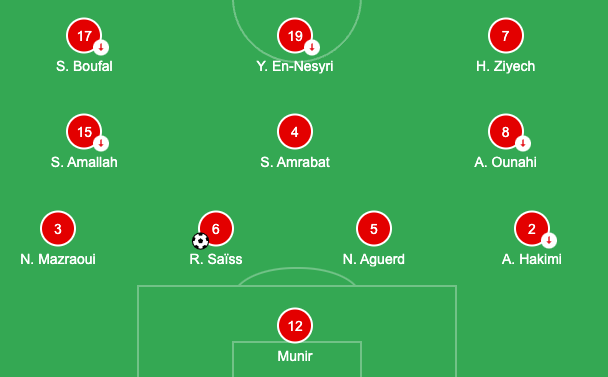

In [25]:
Image(filename='morocco_formation.png')

Throughout the competition, Morocco consistently employed a 4-3-3 formation with minimal changes to their starting lineup. The players depicted in the preceding images represent those who accrued the most playing time in their respective positions. In light of the need to maximize Christian Benteke's impact and leverage the technical skills of Gabriel Pirani, an analysis will be conducted with a focus on Morocco's target striker, Youseff En-Nesyri. This examination aims to uncover strategies that can enhance the utilization of Benteke and Pirani by drawing parallels to En-Nesyri's role and performance within Morocco's tactical setup.

In [26]:
# Make a dataframe where team is Morocco
morocco_events = df[df['team'] == 'Morocco']


## Morocco's Shot Distribution and Vanguard of the Attack

/var/folders/cr/687s4h5s3ndb0qw1gmsgrrlh0000gn/T/ipykernel_86246/990319761.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morocco_events['location'] = morocco_events['location'].apply(safe_literal_eval)
/var/folders/cr/687s4h5s3ndb0qw1gmsgrrlh0000gn/T/ipykernel_86246/990319761.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morocco_events['x'] = morocco_events['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
/var/folders/cr/687s4h5s3ndb0qw1gmsgrrlh0000gn/T/ipykernel_86246/

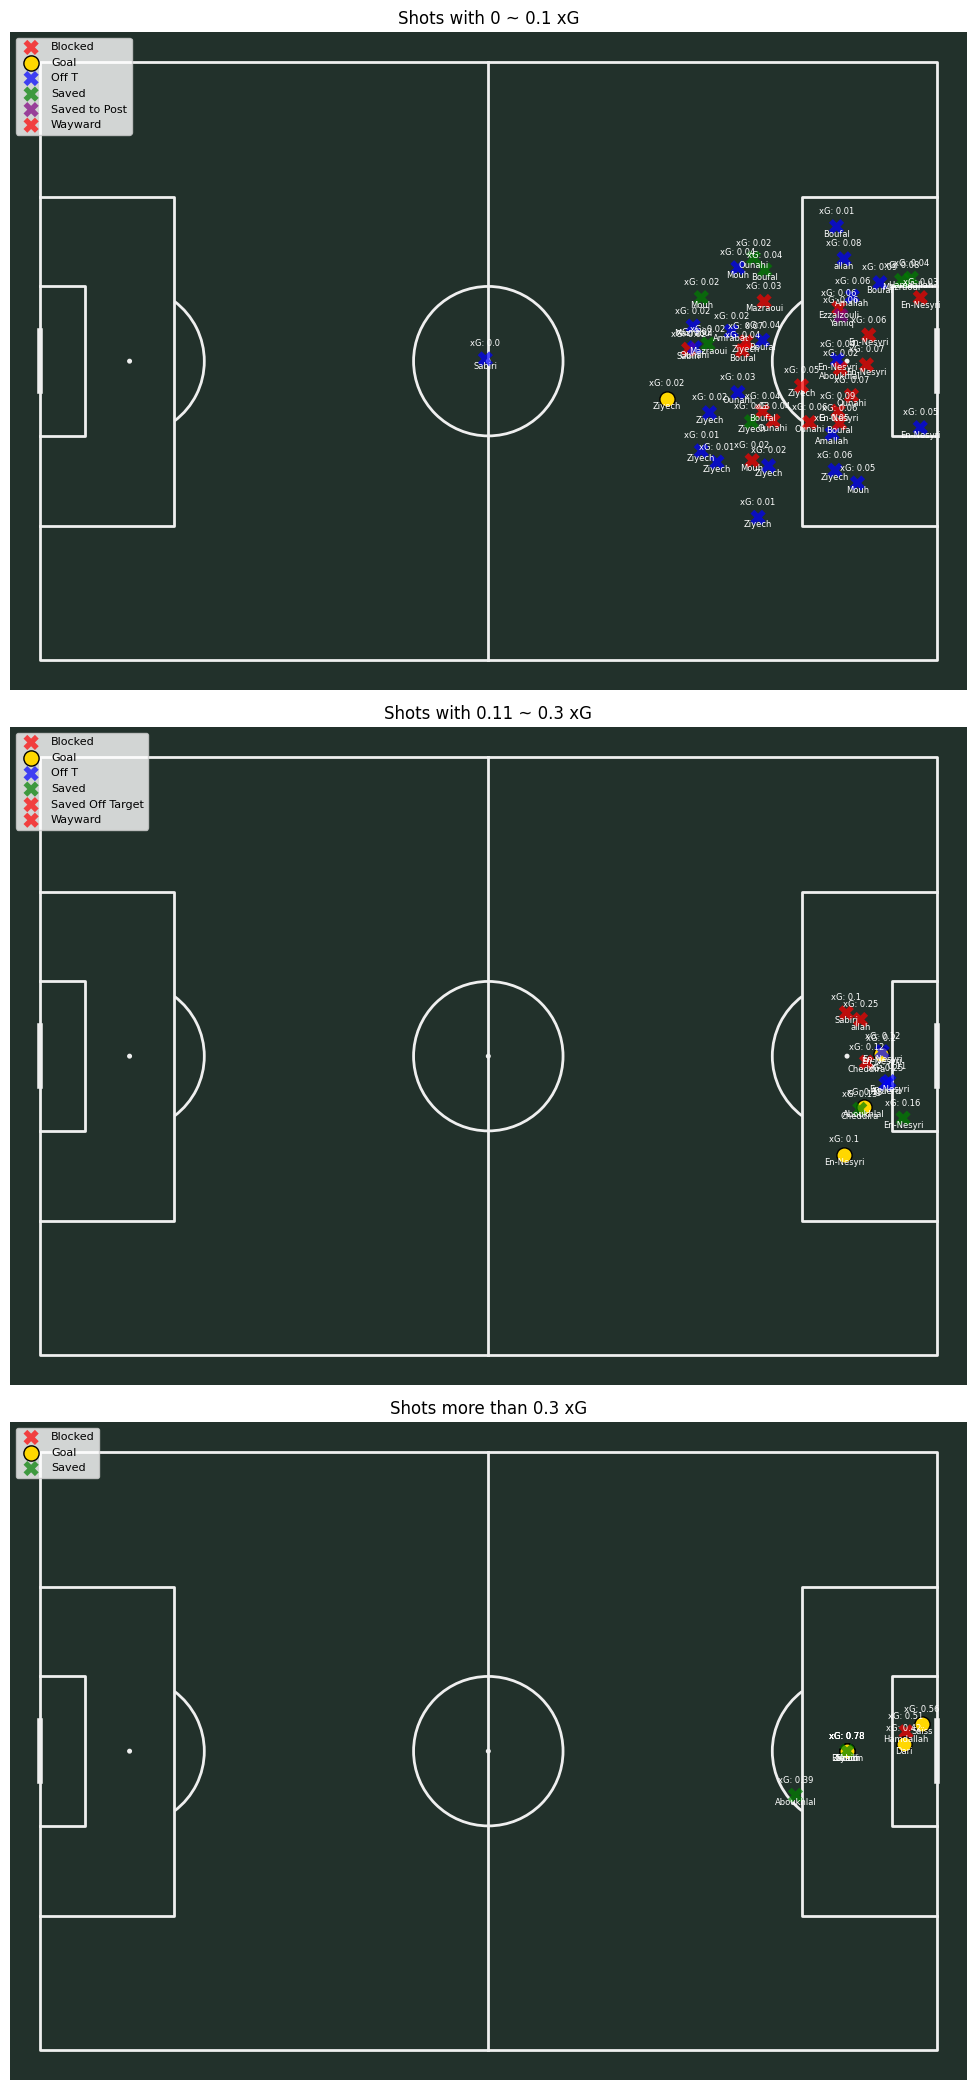

In [27]:
# Define a color for each shot outcome
outcome_colors = {
    'Goal': 'gold',
    'Saved': 'green',
    'Missed': 'lightgreen',
    'Blocked': 'red',
    'Saved to Post': 'purple',
    'Off T': 'blue'
}

default_color = 'red'
default_marker = 'X'

def safe_literal_eval(val):
    if not isinstance(val, str):
        return val
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return val

# Apply 'safe_literal_eval' to the 'location' column
morocco_events['location'] = morocco_events['location'].apply(safe_literal_eval)

# Extract 'x', 'y' coordinates and proceed with the rest of the code
morocco_events['x'] = morocco_events['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
morocco_events['y'] = morocco_events['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
morocco_events['last_name'] = morocco_events['player'].apply(lambda name: name.split()[-1] if pd.notna(name) else '')
morocco_events['shot_statsbomb_xg'] = morocco_events['shot_statsbomb_xg'].astype(float).round(2)

shots = morocco_events[morocco_events['type'] == 'Shot'].dropna(subset=['location'])

# Splitting shots into three categories based on xG values
low_xg_shots = shots[(shots['shot_statsbomb_xg'] >= 0) & (shots['shot_statsbomb_xg'] < 0.1)]
medium_xg_shots = shots[(shots['shot_statsbomb_xg'] >= 0.1) & (shots['shot_statsbomb_xg'] < 0.3)]
high_xg_shots = shots[shots['shot_statsbomb_xg'] >= 0.3]

# Function to plot shots
def plot_shots(subset, title, ax, outcome_colors, default_color='red', default_marker='X'):
    # Dictionary to hold custom legend handles
    legend_handles = {}
    
    for outcome, outcome_df in subset.groupby('shot_outcome'):
        color = outcome_colors.get(outcome, default_color)
        marker_style = 'o' if outcome == 'Goal' else default_marker
        alpha = 1 if outcome == 'Goal' else 0.7
        edgecolors = 'black' if outcome == 'Goal' else 'none'
        
        scatter = pitch.scatter(outcome_df['x'], outcome_df['y'], ax=ax, marker=marker_style, s=120,
                                color=color, edgecolors=edgecolors, alpha=alpha, label=outcome)
        
        # Create a legend handle for each outcome
        legend_handles[outcome] = scatter
        
        # Annotating player's last name and xG value
        for x, y, name, xg in zip(outcome_df['x'], outcome_df['y'], outcome_df['last_name'], outcome_df['shot_statsbomb_xg']):
            ax.text(x, y + 1, name, fontsize=6, ha='center', va='center', color='white')
            ax.text(x, y - 2, f'xG: {xg}', fontsize=6, ha='center', va='center', color='white')
    
    ax.set_title(title, color='black')
    
    # Using values of legend_handles to ensure unique legend entries
    ax.legend(handles=list(legend_handles.values()), loc='upper left', fontsize=8)

# Creating and plotting each category of shots on separate subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 21))
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#efefef')

pitch.draw(ax=axs[0])
plot_shots(low_xg_shots, 'Shots with 0 ~ 0.1 xG', axs[0], outcome_colors)

pitch.draw(ax=axs[1])
plot_shots(medium_xg_shots, 'Shots with 0.11 ~ 0.3 xG', axs[1], outcome_colors)

pitch.draw(ax=axs[2])
plot_shots(high_xg_shots, 'Shots more than 0.3 xG', axs[2], outcome_colors)



plt.tight_layout()
plt.show()


1. The Concept of Expected Goals (xG) and Its Categorization

Expected Goals (xG) is a statistical metric that evaluates the quality of scoring opportunities in soccer, assigning a probability (ranging from 0 to 1) that a given shot will result in a goal. This probability is calculated based on various factors, including the shot's angle, distance, and the game situation. For the purpose of analysis, xG values have been categorized into three distinct classes: low (0.01 to 0.10), indicating opportunities with a minimal likelihood of scoring; medium (0.11 to 0.3), representing chances with a moderate probability of success; and high (0.31 and above), reflecting situations where scoring is highly probable. This classification enables a nuanced understanding of scoring opportunities' quality and their potential impact on match outcomes.

2. Morocco’s Shooting Performance in the Tournament

Throughout the tournament, Morocco generated a total of 66 shots, with the notable exception of Hakim Ziyech’s long-distance goal against Canada, which resulted from a goalkeeping error. Excluding this outlier, all of Morocco’s goals originated from within the penalty box, with the shots leading to goals having relatively high xG values. This pattern underscores Morocco’s strategic focus on creating high-quality scoring chances close to the goal, rather than relying on long-distance shots.

3. Implications for Teams with a Target Striker Like Our Team

For teams like our team, which possess a proficient target striker, Morocco’s approach offers valuable insights into effective scoring strategies. Rather than depending on ambitious long-range efforts, the key to converting possession into goals lies in penetrating the opposition’s box to create high-probability scoring opportunities. This tactical emphasis on delivering the ball into the penalty area to exploit a target striker’s strengths highlights an essential approach for teams aiming to enhance their goal-scoring efficacy.

In [28]:
# Grouping shots by player and calculating the average xG value
player_shots = shots.groupby('last_name').agg({'shot_statsbomb_xg': 'mean', 'type': 'count'}).rename(columns={'type': 'shots_count'})
player_shots = player_shots.sort_values('shots_count', ascending=False).head(10)

player_shots



,shot_statsbomb_xg,shots_count
last_name,,
Ziyech,0.098182,11
En-Nesyri,0.093636,11
Boufal,0.045714,7
Ounahi,0.040000,6
Mouh,0.182000,5
Sabiri,0.225000,4
Mazraoui,0.037500,4
Aboukhlal,0.196667,3
Hamdallah,0.275000,2


An analysis of the actual shot count and Expected Goals (xG) reveals that Youseff En-Nesyri and Hakim Ziyech played pivotal roles in leading Morocco's offensive efforts throughout the tournament, accounting for a third of the team's total shots. Notably, a significant portion of Ziyech’s attempts originated from outside the penalty box, including free kicks and penalty kicks, highlighting his role in executing set pieces as well as long-range efforts. In contrast, all of En-Nesyri’s shots were taken from within the penalty area, underscoring his position as a classic target striker who capitalizes on close-range scoring opportunities.

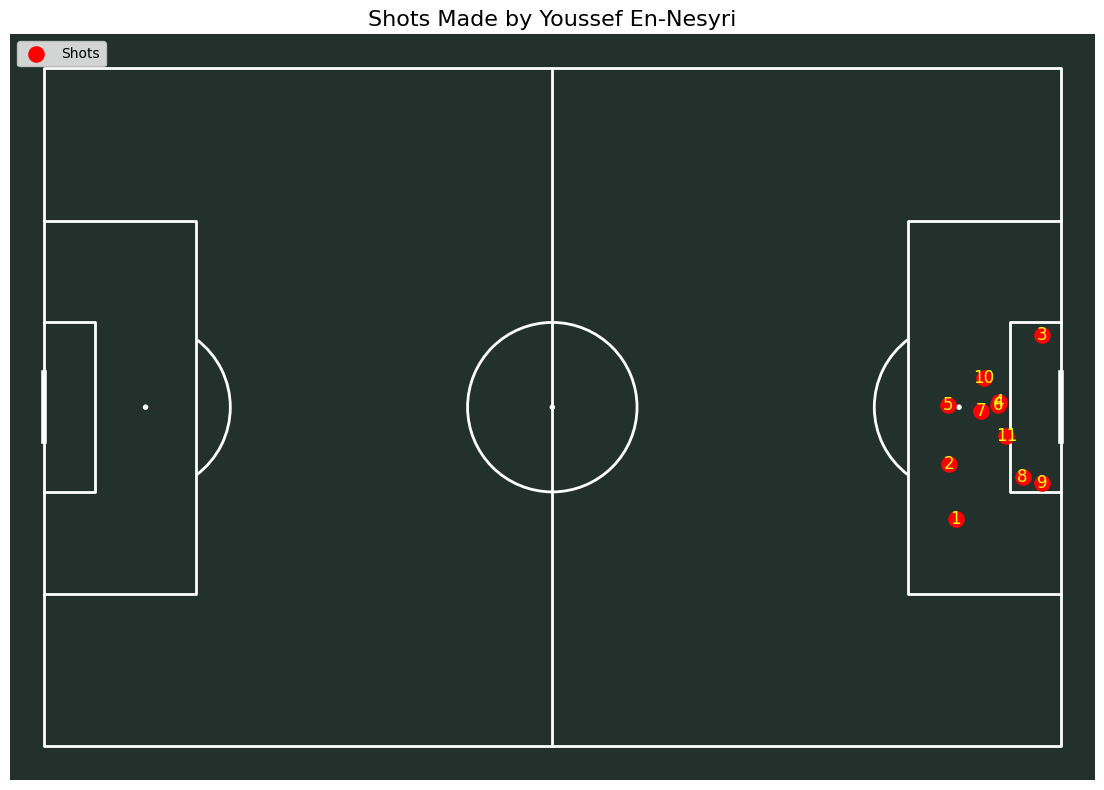

In [35]:
enesyri_shots = shots[shots['player'] == 'Youssef En-Nesyri']
enesyri_shots = enesyri_shots.sort_values(by=['match_id', 'timestamp'])
enesyri_shots['shot_sequence'] = range(1, len(enesyri_shots) + 1)

pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='white')
fig, ax = pitch.draw(figsize=(12, 8))
sc = pitch.scatter(enesyri_shots['x'], enesyri_shots['y'], s=120, ax=ax, label='Shots', color='red')

# Annotating each shot with its number
for x, y, sequence in zip(enesyri_shots['x'], enesyri_shots['y'], enesyri_shots['shot_sequence']):
    plt.text(x, y, str(sequence), color="yellow", fontsize=12, ha='center', va='center')

plt.title('Shots Made by Youssef En-Nesyri', fontsize=16, color='Black')
plt.legend(loc='upper left')
plt.show()


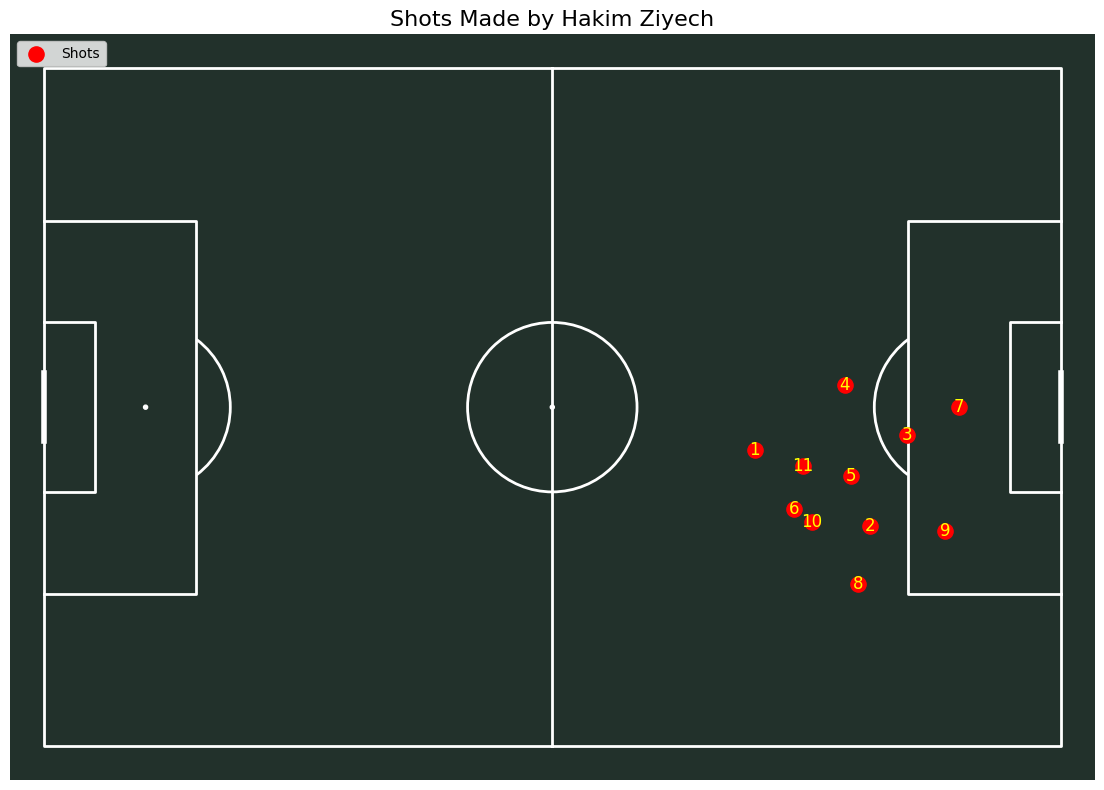

In [36]:
ziyech_shots = shots[shots['player'] == 'Hakim Ziyech']
ziyech_shots = ziyech_shots.sort_values(by=['match_id', 'timestamp'])
ziyech_shots['shot_sequence'] = range(1, len(ziyech_shots) + 1)

pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='white')
fig, ax = pitch.draw(figsize=(12, 8))
sc = pitch.scatter(ziyech_shots['x'], ziyech_shots['y'], s=120, ax=ax, label='Shots', color='red')

# Annotating each shot with its number
for x, y, sequence in zip(ziyech_shots['x'], ziyech_shots['y'], ziyech_shots['shot_sequence']):
    plt.text(x, y, str(sequence), color="yellow", fontsize=12, ha='center', va='center')

plt.title('Shots Made by Hakim Ziyech', fontsize=16, color='Black')
plt.legend(loc='upper left')
plt.show()


In [29]:
headers = shots[shots['shot_body_part'] == 'Head']

# Counting headers by player
header_counts = headers['player'].value_counts().reset_index()
header_counts.columns = ['player', 'header_count']

# Displaying the player with the most header attempts
print(header_counts.head(3))


              player  header_count
0  Youssef En-Nesyri             7
1  Noussair Mazraoui             1
2       Nayef Aguerd             1


As expected, En-Nesyri had the most shots and headers as a target striker just like Christian Benteke and seems like Ziyech plays as a technician how he used to play in Ajax and Chelsea.

## Who Had the Most linkage with En-Nesyri?


In [30]:
# Filter for pass events
pass_events = morocco_events[morocco_events['type'] == 'Pass']

# Filter passes involving En-Nesyri either as the passer or the recipient
enesyri_passes = pass_events[(pass_events['player'] == 'Youssef En-Nesyri') | 
                             (pass_events['pass_recipient'] == 'Youssef En-Nesyri')]

# Identify linkage - who passes to En-Nesyri and who receives passes from him
linkage_counts = pd.concat([
    enesyri_passes['player'].value_counts(), 
    enesyri_passes['pass_recipient'].value_counts()
]).groupby(level=0).sum().sort_values(ascending=False)

# Remove En-Nesyri from the linkage count to focus on other players
linkage_counts = linkage_counts.drop(index=['Youssef En-Nesyri'], errors='ignore')

# Display the top player who has the most linkage with En-Nesyri
print(linkage_counts.head(5))


Hakim Ziyech          32
Achraf Hakimi Mouh    30
Sofiane Boufal        21
Sofyan Amrabat        19
Azzedine Ounahi       17
Name: count, dtype: int64


Hakim Ziyech emerged as the top player in terms of creating linkages with Youseff En-Nesyri, registering 32 interactions. Close behind, Achraf Hakimi Mouh facilitated 30 connections, underscoring the significant role both players played in collaborating with En-Nesyri during the tournament.\
**The data suggests that Youseff En-Nesyri had a stronger connection with players operating primarily on the right side of the pitch** \
The involvement of Achraf Hakimi Mouh, a defender, in creating a significant number of connections with En-Nesyri is particularly intriguing. This suggests a tactical approach where Hakimi Mouh, despite his defensive role, plays a crucial part in the team's offensive plays, likely utilizing his pace and crossing ability to support En-Nesyri. This pattern of interaction not only underlines the fluidity and versatility within Morocco's playstyle but also showcases how modern football often requires defenders to contribute to attacking efforts, blurring the traditional roles within the team.


In [39]:
morocco_events['location'] = morocco_events['location'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)

# a new DataFrame with x and y coordinates as separate columns
morocco_events['x'] = morocco_events['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
morocco_events['y'] = morocco_events['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)

# Filter out rows where location data is not available (NaN)
morocco_events = morocco_events.dropna(subset=['x', 'y'])

# group by player and calculate the mean of x and y coordinates
df_positions = morocco_events.groupby('player')[['x', 'y']].mean().reset_index()

# Rename the columns to 'avg_x' and 'avg_y'
df_positions.columns = ['player', 'avg_x', 'avg_y']

df_positions.head(5)



,player,avg_x,avg_y
0,Abdelhamid Sabiri,58.675833,29.877917
1,Abderrazak Hamdallah,81.512381,38.472381
2,Abdessamad Ezzalzouli,62.581600,16.535200
3,Achraf Dari,36.804204,47.151051
4,Achraf Hakimi Mouh,55.003339,68.450874


In [38]:
# Make Morocco's pass events DataFrame
morocco_passes = df[df['team'] == 'Morocco']
morocco_passes = morocco_passes[morocco_passes['type'] == 'Pass']


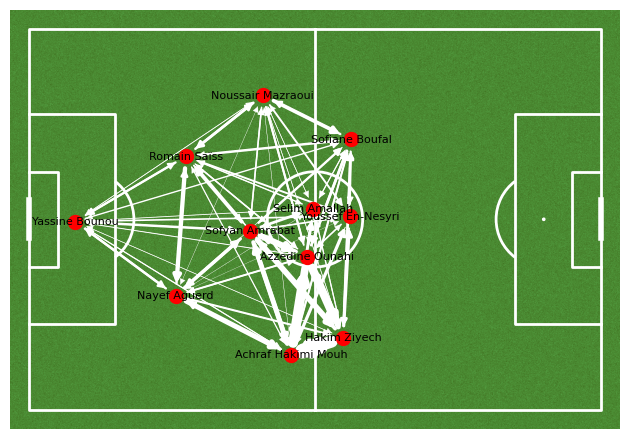

In [40]:
# Best eleven list
best_eleven = ['Yassine Bounou', 'Achraf Hakimi Mouh', 'Nayef Aguerd', 'Romain Saïss', 'Noussair Mazraoui', 
               'Sofyan Amrabat', 'Azzedine Ounahi', 'Selim Amallah', 'Hakim Ziyech', 'Sofiane Boufal', 'Youssef En-Nesyri']

# Filter the pass data to only include passes between players in the best_eleven list
df_passes_filtered = morocco_passes[(morocco_passes['player'].isin(best_eleven)) & (morocco_passes['pass_recipient'].isin(best_eleven))]

# Create the graph
G = nx.DiGraph()

# Add weighted edges based on the filtered pass data
for _, pass_event in df_passes_filtered.iterrows():
    player = pass_event['player']
    recipient = pass_event['pass_recipient']
    G.add_edge(player, recipient, weight=G.get_edge_data(player, recipient, default={'weight':0})['weight'] + 1)

# Filter df_positions to only include players present in the graph G and in best_eleven
df_positions_filtered = df_positions[df_positions['player'].isin(G.nodes) & df_positions['player'].isin(best_eleven)]

# Define the position of each node using the average positions from df_positions
node_positions = df_positions.set_index('player')[['avg_x', 'avg_y']].to_dict('index')
node_positions = {player: (data['avg_x'], data['avg_y']) for player, data in node_positions.items() if player in G.nodes}

# Draw the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw()

# Draw the network with nodes and labels
nx.draw_networkx_nodes(G, pos=node_positions, node_size=100, node_color='red', ax=ax)
nx.draw_networkx_labels(G, pos=node_positions, ax=ax, font_size=8)
# Draw edges with varying width based on the weight attribute
edges = nx.draw_networkx_edges(G, pos=node_positions, ax=ax, arrowstyle='-|>', arrowsize=10,
                               edge_color='white', width=[G[u][v]['weight']*0.1 for u,v in G.edges()])

plt.show()

- Youseff En-Nesyri appears central to the network, indicating his role as a focal point in the team's attack, frequently receiving passes from multiple teammates.
- The strong connections between En-Nesyri and both Hakim Ziyech and Achraf Hakimi Mouh are evident. These thick lines suggest a high frequency of interaction, aligning with the data showing they are the top two players linked with En-Nesyri.
- The network also shows that there's significant interplay between the defense and offense, as evidenced by the connections from Achraf Hakimi Mouh and other defenders to attacking players.
- The presence of thick lines connecting players located on the right side of the field, like Hakim Ziyech and Achraf Hakimi Mouh, indicates that Morocco’s strategy may involve heavy play on that wing.

## Event Sequence of Youseff En-Nesyri's goal chance

In [41]:
def find_preceding_events(shot_event, all_events, some_threshold=30):
    """
    Identifies events leading up to a shot, excluding 'Pressure' type events.
    Resets sequence if an event from a non-Morocco team occurs.

    Parameters:
    - shot_event: The row from the DataFrame for the shot event.
    - all_events: DataFrame of all events in the match.
    - some_threshold: Time threshold in seconds to consider events as part of the same sequence.
    - team_name: The name of the team for which events are considered (default is 'Morocco').

    Returns:
    - DataFrame of events leading up to the shot, including the shot itself.
    
    """
    
    # Filter out 'Pressure' events from all_events before starting the loop
    all_events_filtered = all_events[(all_events['type'] != 'Pressure') & (all_events['type'] != 'Clearance') & (all_events['type'] != 'Error') & (all_events['match_id'] == shot_event['match_id'])]

    # Also Filter out all events after the shot
    all_events_filtered = all_events_filtered[all_events_filtered['minute'] <= shot_event['minute']]
    all_events_filtered = all_events_filtered[all_events_filtered['timestamp'] < shot_event['timestamp']]


    shot_timestamp = pd.to_datetime(shot_event['timestamp'])
    preceding_events = []

    # Initialize a temporary list to collect events until a non-team event is encountered
    temp_events = []

    # Iterate through events leading up to the shot, within the time threshold
    for _, current_event in all_events_filtered.iterrows():
        current_timestamp = pd.to_datetime(current_event['timestamp'])
        time_diff = (shot_timestamp - current_timestamp).total_seconds()
        
        # Only consider events within the time threshold leading up to the shot
        if 0 < time_diff < some_threshold:
            # If an event from the specified team is encountered, keep collecting
            if current_event['team'] == 'Morocco':
                temp_events.append(current_event)
            else:
                # If a non-team event is encountered, reset temp_events
                temp_events.clear()

    # Convert temp_events to a DataFrame
    preceding_events_df = pd.DataFrame(temp_events)
    

    # Add the shot event to the sequence
    final_sequence = pd.concat([preceding_events_df, pd.DataFrame([shot_event])])

    return final_sequence.sort_values(by=['minute','timestamp'])




In [43]:
# Sorting by match_id first, then by timestamp within each match
events_sorted = df.sort_values(by=['match_id', 'minute', 'timestamp'])

# Reset the index after sorting
events_sorted = events_sorted.reset_index(drop=True)

# Now, morocco_events_sorted is correctly sorted for sequence analysis
print(events_sorted.shape[0])

# save the sorted events to a csv file for future use
events_sorted.to_csv('morocco_world_cup_events_sorted.csv', index=False)


25971


In [44]:
# Filter for shots by Youssef En-Nesyri
enesyri_shots = events_sorted[(events_sorted['type'] == 'Shot') & (events_sorted['player'] == 'Youssef En-Nesyri')]

# For demonstration, let's find preceding events for the first shot by En-Nesyri

first_shot = enesyri_shots.iloc[0]
sequence = find_preceding_events(first_shot, events_sorted, some_threshold=20)


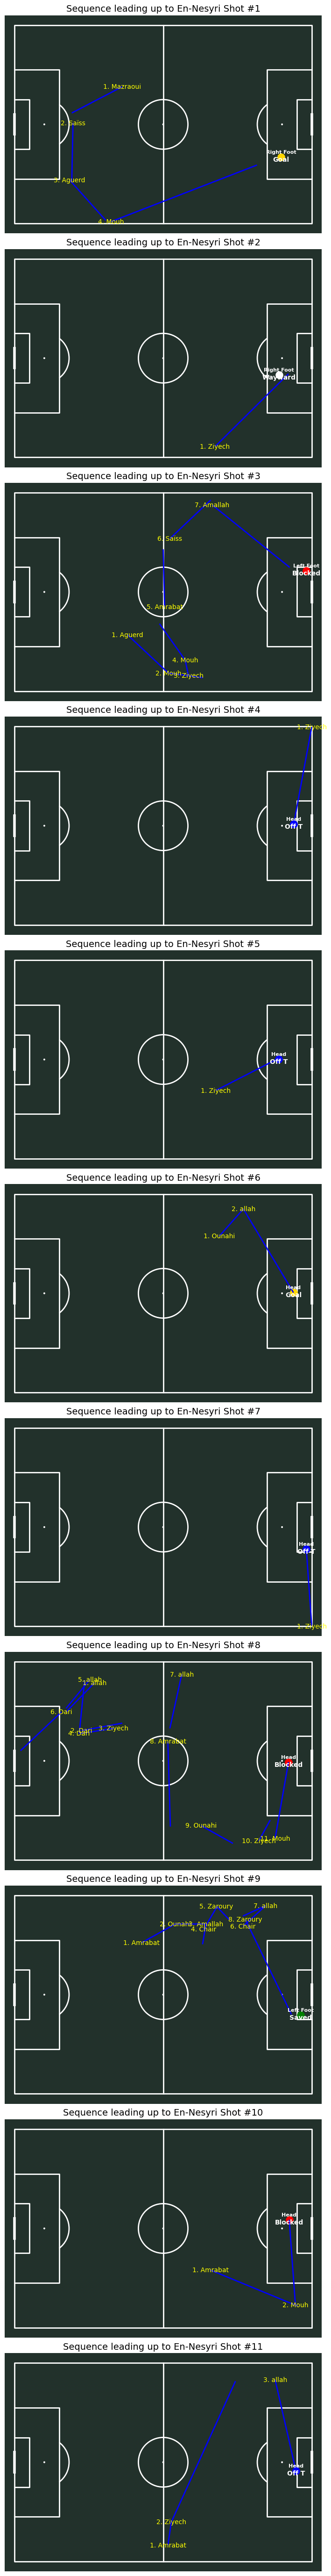

In [ ]:
num_shots = len(enesyri_shots)

# Create a figure with multiple subplots arranged vertically (one per shot)
fig, axs = plt.subplots(num_shots, 1, figsize=(10, 5 * num_shots), constrained_layout=True)  # Increased the vertical size

# Ensure axs is an array even when there's only one shot
if num_shots == 1:
    axs = [axs]

# Iterate through each shot and plot the preceding sequence
for ax, (_, shot) in zip(axs, enesyri_shots.iterrows()):
    sequence = find_preceding_events(shot, events_sorted, some_threshold=20)
    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='white')  # Adjusted figsize for each pitch
    pitch.draw(ax=ax)
    
    pass_counter = 1
    for i, event in sequence.iterrows():
        if pd.notna(event['location']):
            start_loc = ast.literal_eval(event['location'])
            
            # Annotate the event with the pass sequence number and player's last name only if it's a Pass
            if event['type'] == 'Pass':
                player_name = event['player'].split()[-1] if pd.notna(event['player']) else 'Unknown'
                annotation_text = f"{pass_counter}. {player_name}"
                pitch.annotate(annotation_text, xy=(start_loc[0], start_loc[1]), c='yellow', va='center', ha='center', size=10, ax=ax)  # Adjusted size for clarity
                
                pass_counter += 1  # Increment the pass counter only for pass events
                
                # If the event is a pass, draw the pass line
                if pd.notna(event['pass_end_location']):
                    end_loc = ast.literal_eval(event['pass_end_location'])
                    pitch.lines(start_loc[0], start_loc[1], end_loc[0], end_loc[1], lw=2, color='blue', ax=ax)

    # Highlighting the shot
    shot_loc = ast.literal_eval(shot['location'])
    shot_outcome = shot['shot_outcome']
    shot_type = shot['shot_body_part']
    shot_color = outcome_colors.get(shot_outcome, 'white')  # Default to 'white' if outcome not in dict
    pitch.scatter(shot_loc[0], shot_loc[1], s=120, color=shot_color, label=shot_outcome, ax=ax)
    pitch.annotate(shot_outcome, xy=(shot_loc[0], shot_loc[1]+1), c='white', va='center', ha='center', size=10, weight='bold', ax=ax)
    pitch.annotate(shot_type, xy=(shot_loc[0], shot_loc[1]-2), c='white', va='center', ha='center', size=8, weight='bold', ax=ax)


# Adding a title to each subplot for clarity
for i, ax in enumerate(axs):
    shot_minute = shot['minute']

    ax.set_title(f'Sequence leading up to En-Nesyri Shot #{i+1}', color='Black', fontsize=14)  # Adjusted font size for clarity

plt.show()

- **Direct Long Balls to En-Nesyri:** The team sometimes bypasses the midfield when switching play from the back. Upon identifying open space, defenders utilize direct long balls to quickly connect with En-Nesyri, thereby exploiting the opponent's defensive gaps and accelerating the transition into attack.

- **Targeted Set-Pieces by Ziyech:** Hakim Ziyech, serving as the designated set-piece taker, consistently aims for En-Nesyri during free kicks and corner kicks. His precise delivery targets En-Nesyri’s aerial strength, creating scoring opportunities through headed attempts.

- **Amrabat’s Pivotal Role in Transitions:** Sofyan Amrabat is frequently involved at the initiation point of the attacks. His role encompasses swiftly altering the direction of play and intercepting opposing attacks through intelligent positioning. Furthermore, Amrabat contributes to the team's offense by promptly distributing the ball forward, initiating quick and effective attacking sequences.


## Conclusion and Recommendations for our team 

Our team stands at the threshold of refining its offensive strategy by enhancing the roles of its key players, target striker Christian Benteke and technician Gabriel Pirani, drawing strategic parallels from the synergistic interplay observed in Morocco's World Cup tactics.

**Implementing the 4-3-3 Formation as Plan B:**
Considering the team's need for a secondary tactical approach, the 4-3-3 formation stands out as a viable Plan B. This structure supports side play strength, encourages defensive overlaps into offensive realms, and provides balance in the midfield to facilitate forward play—all while maintaining the capacity to adapt to opponents' tactics and leverage our strategic advantages.

**Maximizing Christian Benteke’s Impact:**
Benteke should mirror En-Nesyri's essential role, becoming the focal point within the penalty area. To optimize Benteke's influence, the team must prioritize creating high xG opportunities through strategic ball delivery into the box, where Benteke's proficiency in converting chances can be fully utilized.

**Evolving Gabriel Pirani’s Role:**
Despite Pirani's current underutilization, the potential and expectations for him within the team remain high. His natural position as an Attacking Midfielder (AMC) positions him well to step into a more dynamic role, reminiscent of Ziyech's impact. With his youth and talent—and previous experiences on the side—enhancing his dribbling and crossing abilities will be crucial. Training to fulfill a role akin to Ziyech's can revitalize his contribution, especially if positioned on the wing where his playmaking can be maximized.

The decision to deploy Pirani on the left or right flank should be strategically informed by the strengths of supporting fullbacks. A fullback with an attacking propensity and a proclivity for vigorous overlapping runs, similar to Morocco's Hakimi Mouh, will be the ideal partner to complement Pirani’s relocated role. This synergy can be a driving force in fortifying our attack from the flanks.

**Capitalizing on Midfield Transitions:**
The embodiment of Amrabat’s role could be replicated by an experienced box-to-box midfielder like Mateusz Klich, who can spark the offense from the midfield. A player of such a profile can expedite transitions, disrupt opposition plays with savvy positioning, and swiftly pivot the team's play from defense to offense, establishing the genesis of our attacking momentum

